<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo-29/blob/main/Actividad_Semanal_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
input= 'https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv'

In [2]:
df = pd.read_csv(input, index_col=0)
df.index.name = None

In [3]:
df.isna().sum()

X1      0
X2      1
X3      2
X4      2
X5      5
X6      3
X7      5
X8      7
X9      9
X10    16
X11    14
X12    11
X13    11
X14    13
X15    15
X16    17
X17    10
X18     8
X19     9
X20     8
X21    11
X22    11
X23     5
Y       3
dtype: int64

In [4]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [5]:
df.shape

(30000, 24)

In [6]:
ndf = df.copy()
ndf.dropna(inplace = True)
ndf.isna().sum()

X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
Y      0
dtype: int64

In [7]:
ndf.shape

(29958, 24)

Nomalizacion Min_Max

In [8]:
ndf.X17.mean().round(2)

38889.93

In [9]:
ndf.X23.mean().round(2)

5220.71

In [10]:
Varience = np.cov([df.X17, df.X23])
Varience

array([[nan, nan],
       [nan, nan]])

In [11]:
#Varianza total 
ndf = ndf[["X17","X23"]]
ndf.var().sum()

3866567925.992055

In [12]:
t= ndf.var().sum()
varC =Varience[0][0]
varR = Varience[1][1]

In [13]:
print('Total Varience \t\t\t:', t.round(2) )
print('Varience prop. of X1 \t:', ((varC/t)*100).round(2),'%' )
print('Varience prop. of X2 \t:', ((varR/t)*100).round(2),'%' )

Total Varience 			: 3866567925.99
Varience prop. of X1 	: nan %
Varience prop. of X2 	: nan %


In [14]:
varX = ndf.X17.to_list()
varY = ndf.X23.to_list()

In [15]:
ndf.corr().round(2)

,X17,X23
X17,1.00,0.12
X23,0.12,1.00


In [16]:
def normalizacion(x):
  min = np.min(x)
  print(min)
  max = np.max(x)
  print(max)
  rango = max-min
  return [(a-min)/rango for a in x]

In [17]:
nVarX = normalizacion(varX)

-339603.0
961664.0


In [18]:
nVarY = normalizacion(varY)

0.0
528666.0


#PCA

In [19]:
import seaborn as sns

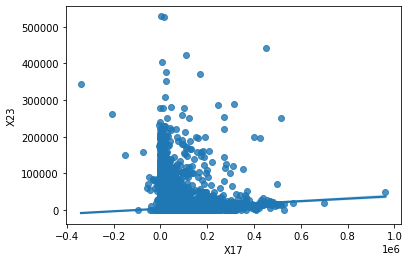

In [20]:
p = sns.regplot(data = df,  
                x = ndf.X17, 
                y = ndf.X23
               ) 
p

In [21]:
import numpy as np
from sklearn.decomposition import PCA

In [22]:
pcs = PCA(n_components=2)

pcs.fit(ndf[['X17', 'X23']])

pcsSummary = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                          'Proportion of variance': pcs.explained_variance_ratio_,
                          'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)#column 
                          }
                          )
pcsSummary

,Standard deviation,Proportion of variance,Cumulative proportion
0,59621.650237,0.919353,0.919353
1,17658.616847,0.080647,1.000000


In [23]:
pcsSummary = pcsSummary.transpose()
pcsSummary.round(2)

,0,1
Standard deviation,59621.65,17658.62
Proportion of variance,0.92,0.08
Cumulative proportion,0.92,1.00


In [24]:
pcsSummary.columns = ['PC1', 'PC2']
pcsSummary = pcsSummary.round(4)
pcsSummary

,PC1,PC2
Standard deviation,59621.6502,17658.6168
Proportion of variance,0.9194,0.0806
Cumulative proportion,0.9194,1.0000


The summary gives the reallocated variance: 
* `z1` accounts for 83.70% of the total variability and 
* `z2` for the remaining 16.30%. 

Therefore, if we drop `z2 = PC2`, we still maintain 86.32% of the total variability. 

### Scree Plot


In [25]:
import matplotlib as mpl
import matplotlib.pyplot as plt

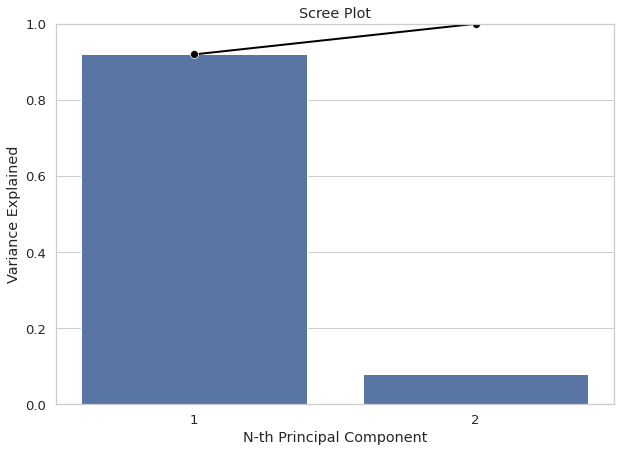

In [26]:
PC_components = np.arange(pcs.n_components_) + 1
#PC_components

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

* The first principal component has the largest possible variance (that is, accounts for as much of the variability in the data as possible)
* Each succeeding component, in turn, has the highest variance possible under the constraint that it is orthogonal the preceding components.

In [27]:
pcs.components_.round(4) #is the set of all eigenvectors for your projection space (one eigenvector for each principal component).

array([[ 0.9993,  0.0377],
       [-0.0377,  0.9993]])

In [28]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), 
                                columns=['PC1', 'PC2'],
                                index=['X17', 'X23']
                                )
pcsComponents_df

,PC1,PC2
X17,0.999287,-0.037749
X23,0.037749,0.999287


> The first column here shows coefficients of linear combination that defines PC1 (z1)

> The second column shows coefficients for PC2 (z2).

In [30]:
scores = pd.DataFrame(pcs.transform(ndf[['X17', 'X23']]),
                      columns=['x', 'y']
                      )
scores.head()

,x,y
0,-39059.284854,-3748.917822
1,-35725.110482,-1873.443946
2,-23332.620858,660.553865
3,-9495.595444,-3865.010376
4,-19916.288870,-3792.584439


Parte 1: Ejercicio guiado 

Revise el ejercicio guiado para el análisis de componentes principales utilizando el conjunto de datos 

Paso 1: Determine el número mínimo de componentes principales que representan la mayor parte de la variación en sus datos

Utilice la proporción acumulada de la varianza que explican los componentes para determinar la cantidad de varianza que explican los componentes principales.
Paso 2: Interprete cada componente principal en términos de las variables originales

Examine la magnitud y la dirección de los coeficientes de las variables originales.
Nota: Cuanto mayor sea el valor absoluto del coeficiente, más importante será la variable correspondiente en el cálculo del componente.
Paso 3: Identifique valores atípicos

Realice alguna gráfica de valores atípicos o boxplot para identificar los valores atípicos. Cualquier punto que esté más alejado de la línea de referencia es un valor atípico.
Parte 2: Responde las siguientes preguntas en una celda de texto en Jupyter Notebook

¿Cuál es el número de componentes mínimo y por qué?
¿Cuál es la variación de los datos que representan esos componentes?
¿Cuál es la pérdida de información después de realizar PCA?
De las variables originales, ¿Cuál tiene mayor y cuál tiene menor importancia en los componentes principales?
¿Cuándo se recomienda realizar un PCA y qué beneficios ofrece para Machine Learning?